# <span style="color: green; font-size: 40px; font-weight: bold;"> Projeto 2 (Classificação) </span>

<br><br>

# Classificação de Fraude em Transações Bancárias

<br><br>

### Contexto

- Um banco está preocupado com o aumento de fraudes em transações bancárias e quer usar um modelo de classificação para identificar transações fraudulentas.
- O **objetivo** é proteger os clientes e minimizar as perdas financeiras devido a fraudes.

<br>

### Problema de Negócio
- Como podemos identificar se uma transação bancária é fraudulenta ou não com base em suas características?

<br>

### Sobre o Conjunto de Dados

O conjunto de dados simulado terá 10.000 linhas e incluirá as seguintes colunas:

<br>

<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>transaction_id</td>
    <td>str</td>
    <td>Identificação única da transação.</td>
  </tr>
  <tr>
    <td>account_age</td>
    <td>int</td>
    <td>Idade da conta em meses.</td>
  </tr>
  <tr>
    <td>transaction_amount</td>
    <td>float</td>
    <td>Valor da transação em reais.</td>
  </tr>
  <tr>
    <td>transaction_type</td>
    <td>str</td>
    <td>Tipo de transação (compra, transferência, saque).</td>
  </tr>
  <tr>
    <td>location</td>
    <td>str</td>
    <td>Localização da transação.</td>
  </tr>
  <tr>
    <td>is_fraud</td>
    <td>int</td>
    <td>Indicador se a transação é fraudulenta (1) ou não (0).</td>
  </tr>
</table>

<br><br>

### Perguntas de Negócio Adicionais:

- Quais padrões de localização estão associados a transações fraudulentas?

> Analisando a localização das transações, podemos identificar se fraudes ocorrem mais frequentemente em determinadas áreas geográficas. Isso pode ajudar a detectar atividades suspeitas em regiões específicas e implementar medidas de segurança mais eficazes.

- Como o valor da transação e o tipo de transação influenciam a probabilidade de fraude?

> Investigando a relação entre o valor da transação e seu tipo (compra, transferência, saque), podemos identificar combinações que são mais susceptíveis a fraudes. Isso permitirá ao banco criar alertas específicos para transações de alto risco.

<br><br>

## Importando Pacotes

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Criação e Visualização de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega a função SMOTE (Balanceamento de Classes)
from imblearn.over_sampling import SMOTE

# Label Enconding
from sklearn.preprocessing import LabelEncoder

# Pacote do Python para Machine Learning
import sklearn

# Função model_selection do pacote sklearn
from sklearn.model_selection import train_test_split    # dividir os dados em treino e teste
from sklearn.model_selection import GridSearchCV        # técnica de utilização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV  # técnica de utilização de hiperparâmetros
from sklearn.model_selection import cross_val_score     # validação cruzada (para avaliação do modelo)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pacotes do sklearn com os Algoritmos

# Função com Algoritmo de ML (Regressão Logística)
from sklearn.linear_model import LogisticRegression     

# Função com Algoritmo de ML (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Função com Algoritmo de ML (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Função com Algoritmo de ML (Árvores de Decisão)
from sklearn.tree import DecisionTreeClassifier

# Função com Algoritmo de ML (SVC)
from sklearn.svm import SVC

# Calcular as Métricas para Avaliação dos Modelos
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Salvar o modelo após o treinamento
import joblib
import pickle

# Indicando que os Gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Mensagens de Aviso
import warnings
warnings.filterwarnings("ignore")

<br><br>

## Carregando Conjunto de Dados

In [2]:
# Carrega o dataset
dados = pd.read_csv('dados/transacoes_bancarias.csv')

In [3]:
# Visualiza
dados.head()

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
0,TX0,103.0,154.239105,saque,online,0
1,TX1,180.0,2.859674,saque,online,0
2,TX2,93.0,59.582040,saque,online,0
3,TX3,15.0,119.546919,transferência,online,0
4,TX4,107.0,236.122174,saque,online,0


In [4]:
# Info
dados.info()

# Verifica se há valores ausentes e duplicados
valores_ausentes = dados.isna().sum().sum() > 0
valores_duplicados = dados.duplicated().sum() > 0

# Nomes das variáveis com valores ausentes
variaveis_ausentes = dados.columns[dados.isna().any()].tolist()

# Nomes das variáveis com valores duplicados (dados duplicados nas linhas inteiras)
variaveis_duplicadas = "Todas as variáveis" if valores_duplicados else "Nenhuma variável"

# Exibe o resultado
print(f"\n\nExistem valores ausentes: {valores_ausentes}")
if valores_ausentes:
    print(f"Variáveis com valores ausentes: {variaveis_ausentes}")
else:
    print("Nenhuma variável possui valores ausentes.")

print(f"Existem valores duplicados: {valores_duplicados}")
if valores_duplicados:
    print(f"Variáveis com valores duplicados: {variaveis_duplicadas}")
else:
    print("Nenhuma variável possui valores duplicados.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      10100 non-null  object 
 1   account_age         9998 non-null   float64
 2   transaction_amount  9996 non-null   float64
 3   transaction_type    10100 non-null  object 
 4   location            10100 non-null  object 
 5   is_fraud            10100 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 473.6+ KB


Existem valores ausentes: True
Variáveis com valores ausentes: ['account_age', 'transaction_amount']
Existem valores duplicados: False
Nenhuma variável possui valores duplicados.


<br>

### Ordem Recomendada das Etapas de Pré-Processamento:

- **Realizar Análise Exploratória** - Realizar Análise Exploratória das Variáveis Numéricas e Categóricas
- **Transformação de Variáveis Categóricas**: Converter variáveis categóricas em numéricas.
- **Tratamento de Valores Ausentes**: Lidar com valores ausentes primeiro garante que as próximas etapas possam ser aplicadas a um conjunto de dados completo e correto.
- **Tratamento de Outliers**: Identificar e tratar outliers evita que esses valores influenciem negativamente as transformações e modelagens subsequentes.
- **Verificação de Correlação**: Avaliar a correlação entre as variáveis para entender suas relações e evitar multicolinearidade.
- **Divisão em Conjuntos de Treino e Teste**: Separar os dados em conjuntos de treino e teste antes de aplicar técnicas de modelagem.
- **Escalonamento de Dados**: Normalizar ou padronizar os dados para garantir que todas as variáveis estejam na mesma escala, especialmente importante para modelos baseados em distância.

<br><br>
## Análise Exploratória de Dados

In [5]:
# Nome das colunas
dados.columns

Index(['transaction_id', 'account_age', 'transaction_amount',
       'transaction_type', 'location', 'is_fraud'],
      dtype='object')

In [6]:
# Visualiza dados
dados.head(3)

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
0,TX0,103.0,154.239105,saque,online,0
1,TX1,180.0,2.859674,saque,online,0
2,TX2,93.0,59.582040,saque,online,0


#### Visualizando Variáveis Categóricas e Numéricas

In [7]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

transaction_id      object
transaction_type    object
location            object
dtype: object

In [8]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

account_age           float64
transaction_amount    float64
is_fraud                int64
dtype: object

<br><br>

## Explorando Variáveis Numéricas

#### Resumo Estatístico

In [9]:
dados.describe()

,account_age,transaction_amount,is_fraud
count,9998.000000,9996.000000,10100.000000
mean,120.575815,198.844169,0.020198
std,68.455560,205.816906,0.140684
min,1.000000,0.010566,0.000000
25%,61.000000,56.419942,0.000000
50%,121.000000,135.178985,0.000000
75%,179.000000,276.411061,0.000000
max,239.000000,3666.699680,1.000000


#### Visualizando através de Gráficos

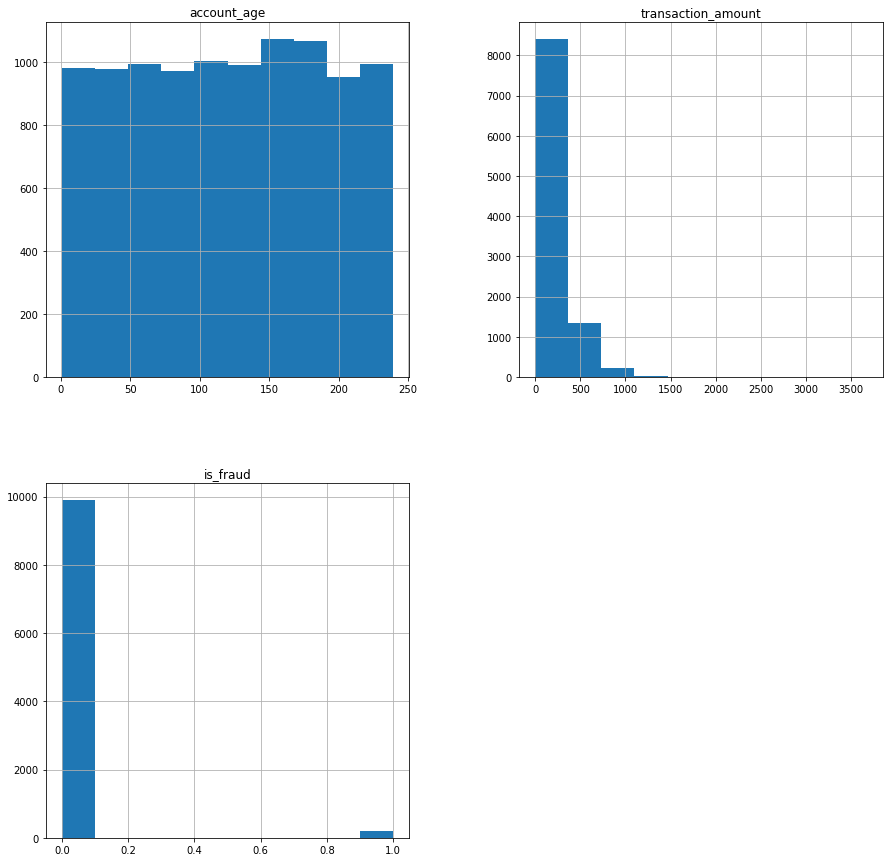

In [10]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- **account_age**: A variável "account_age" está bem distribuída e não apresenta muitos outliers. Isso indica que a idade das contas é uma variável estável e pode ser usada diretamente nos modelos de machine learning.
- **transaction_amount**: A variável "transaction_amount" possui uma distribuição assimétrica com uma cauda longa à direita, indicando a presença de outliers. Será necessário considerar técnicas para lidar com esses outliers, como a transformação dos dados ou a utilização de técnicas robustas a outliers.
- **is_fraud**: A variável "is_fraud" é altamente desbalanceada, o que pode afetar a performance dos modelos de machine learning. Técnicas de balanceamento, como a sobremostragem da classe minoritária ou a subamostragem da classe majoritária, devem ser consideradas para melhorar a capacidade dos modelos em identificar transações fraudulentas.

#### Conclusão:

- As variáveis "account_age" está bem distribuída e estável, "transaction_amount" apresenta outliers significativos, e "is_fraud" é altamente desbalanceada, exigindo técnicas de balanceamento para melhorar a detecção de fraudes.

<br><br>

## Explorando Variável Categórica

#### Resumo Estatístico

In [11]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,transaction_id,transaction_type,location
count,10100,10100,10100
unique,10100,3,2
top,TX0,compra,online
freq,1,3396,5171


In [12]:
# Verificando Tipo das Variáveis
print(dados['transaction_id'].unique())
print(dados['transaction_type'].unique())
print(dados['location'].unique())

['TX0' 'TX1' 'TX2' ... 'TX10097' 'TX10098' 'TX10099']
['saque' 'transferência' 'compra']
['online' 'fisico']


#### Visualizando através de Gráfico

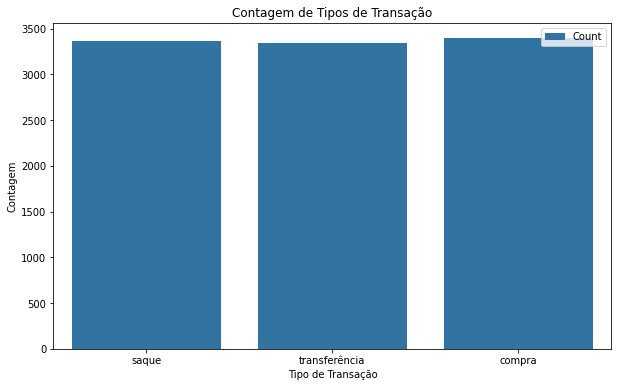

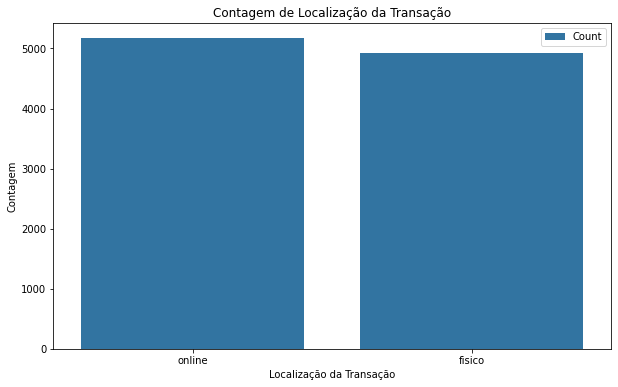

Contagem de tipos de transação:
Tipo de transação compra: 3396
Tipo de transação saque: 3362
Tipo de transação transferência: 3342

Contagem de localização da transação:
Localização online: 5171
Localização fisico: 4929


In [13]:
# Exibindo o gráfico de contagem para 'transaction_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='transaction_type', label='Count')
plt.title('Contagem de Tipos de Transação')
plt.xlabel('Tipo de Transação')
plt.ylabel('Contagem')
plt.show()

# Exibindo o gráfico de contagem para 'location'
plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='location', label='Count')
plt.title('Contagem de Localização da Transação')
plt.xlabel('Localização da Transação')
plt.ylabel('Contagem')
plt.show()

# Value counts for 'transaction_type'
transaction_type_counts = dados['transaction_type'].value_counts()
print("Contagem de tipos de transação:")
for transaction_type, count in transaction_type_counts.items():
    print(f'Tipo de transação {transaction_type}: {count}')

# Value counts for 'location'
location_counts = dados['location'].value_counts()
print("\nContagem de localização da transação:")
for location, count in location_counts.items():
    print(f'Localização {location}: {count}')

<br>

## Aplicando Label Encoding
#### Vamos transformar as variáveis **Categóricas** transaction_type e location na sua represetação **Numérica**

In [14]:
dados.columns

Index(['transaction_id', 'account_age', 'transaction_amount',
       'transaction_type', 'location', 'is_fraud'],
      dtype='object')

In [15]:
dados.sample(10)

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
3308,TX3308,113.0,175.345875,saque,online,0
5969,TX5969,177.0,579.486959,saque,fisico,0
8474,TX8474,21.0,25.863418,saque,online,0
9760,TX9760,170.0,428.784372,compra,online,0
7665,TX7665,179.0,166.729780,transferência,online,0
1971,TX1971,158.0,8.016942,saque,fisico,0
2061,TX2061,230.0,221.497061,saque,online,0
940,TX940,56.0,168.242559,compra,fisico,0
9280,TX9280,78.0,145.185562,compra,online,0
7151,TX7151,6.0,213.186789,transferência,fisico,0


In [16]:
# Inicializando os label encoders
le_transaction_type = LabelEncoder()
le_location = LabelEncoder()

# Aplicando label encoding às variáveis categóricas
dados['transaction_type'] = le_transaction_type.fit_transform(dados['transaction_type'])
dados['location'] = le_location.fit_transform(dados['location'])

In [17]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      10100 non-null  object 
 1   account_age         9998 non-null   float64
 2   transaction_amount  9996 non-null   float64
 3   transaction_type    10100 non-null  int64  
 4   location            10100 non-null  int64  
 5   is_fraud            10100 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 473.6+ KB


In [18]:
dados.sample(10)

,transaction_id,account_age,transaction_amount,transaction_type,location,is_fraud
4382,TX4382,194.0,45.752728,1,1,0
5812,TX5812,92.0,39.600897,0,1,0
4507,TX4507,178.0,11.469798,2,0,0
6429,TX6429,59.0,865.456093,2,0,0
6624,TX6624,192.0,278.703231,2,0,0
5054,TX5054,27.0,135.380498,2,0,0
4764,TX4764,188.0,36.693618,2,1,0
529,TX529,58.0,107.443428,0,0,0
6372,TX6372,13.0,237.755862,0,1,1
7219,TX7219,32.0,97.464900,2,1,0


<br>

### Removendo Variável transaction_id

In [19]:
# Removendo a variável transaction_id
dados = dados.drop('transaction_id', axis=1)

# Verificando as primeiras linhas do dataframe após a remoção
print(dados.head(2))

   account_age  transaction_amount  transaction_type  location  is_fraud
0        103.0          154.239105                 1         1         0
1        180.0            2.859674                 1         1         0


<br>

# Limpeza nos Dados

<br>

### Tratando Valores Ausentes

In [20]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

account_age           102
transaction_amount    104
transaction_type        0
location                0
is_fraud                0
dtype: int64

In [21]:
# Eliminando as linhas com valores ausentes
dados = dados.dropna()


# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

account_age           0
transaction_amount    0
transaction_type      0
location              0
is_fraud              0
dtype: int64

<br>

## Tratando Valores Duplicados

In [22]:
# Shape
print(dados.shape)

# Verifica quantidade de valores duplicados
print(dados.duplicated().sum())

(9894, 5)
94


In [24]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()

# Shape
print(dados.shape)

(9800, 5)


<br>

## Tratando Valores Outliers

- Conforme dito acima, vamos olhar para a variável **transaction_amount**.

- Tratar valores outliers
- dividir dados em treino e teste
- após divisão aplicar padronização
- aplicar balanceamento na variável alvo